In [1]:
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3

  Using cached numpy-2.2.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.0-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.0 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.0 which is incompatible.


  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.0
    Uninstalling numpy-2.2.0:
      Successfully uninstalled numpy-2.2.0


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'C:\Users\Vedant\Downloads\Fraud.csv')

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Data Preprocessing

In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
df_encoded = pd.get_dummies(df, columns=['type'], drop_first=True) 
df_encoded.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,True,False
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,True,False
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,True
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,True,False,False,False
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,True,False


In [9]:
df_encoded['type_CASH_OUT']= df_encoded['type_CASH_OUT'].astype(int)
df_encoded.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,False,True,False
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,False,True,False
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,False,False,True
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,False,False,False
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,False,True,False


In [10]:
df_encoded['type_DEBIT']= df_encoded['type_DEBIT'].astype(int)

In [11]:
df_encoded['type_PAYMENT']= df_encoded['type_PAYMENT'].astype(int)

In [12]:
df_encoded['type_TRANSFER']= df_encoded['type_TRANSFER'].astype(int)

In [13]:
df_encoded['nameOrig'].nunique()

6353307

In [14]:
df_encoded.shape

(6362620, 14)

In [15]:
df_encoded['nameDest'].nunique()

2722362

#### Categorical variables such as 'nameOrig' and 'nameDest' are also removed from X as they have large no. of unique values which cannot be encoded .

In [16]:
X=df_encoded.drop(['nameOrig','nameDest'],axis=1)
X.corr()['isFraud']

step              0.031578
amount            0.076688
oldbalanceOrg     0.010154
newbalanceOrig   -0.008148
oldbalanceDest   -0.005885
newbalanceDest    0.000535
isFraud           1.000000
isFlaggedFraud    0.044109
type_CASH_OUT     0.011256
type_DEBIT       -0.002911
type_PAYMENT     -0.025697
type_TRANSFER     0.053869
Name: isFraud, dtype: float64

#### From correlation values it can be seen that newbalanceDest has least effect on the target hence it is removed in the following steps.

In [17]:
y=X['isFraud']

In [18]:
X=X.drop(['isFraud','newbalanceDest'],axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

## Logistic Regression

Best parameters: {'logreg__C': 100, 'logreg__penalty': 'l1'}
Best F1-score: 0.6699906629318393


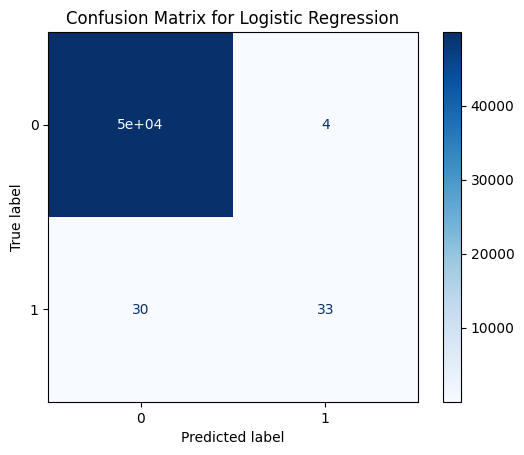

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE # or other imblearn techniques
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import StratifiedKFold


# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
     # or ClassWeighting in LogisticRegression
    ('logreg', LogisticRegression(random_state=42, solver='liblinear'))
])

# Define the parameter grid for Logistic Regression
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2']
}

# Define the scoring metric for GridSearchCV
scorer = make_scorer(f1_score, pos_label=1) # Focus on F1-score for the minority class
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring=scorer, n_jobs=-1)
X_train_np = X_train.iloc[0:50000]
y_train_np = y_train.iloc[0:50000]

grid_search.fit(X_train_np, y_train_np)

# Get the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

# Evaluate on test set
y_pred = grid_search.predict(X_test.iloc[0:50000])
# Further evaluation with precision, recall, ROC AUC etc.
best_pipeline = grid_search.best_estimator_

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.iloc[0:50000], y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues) # You can change the colormap
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

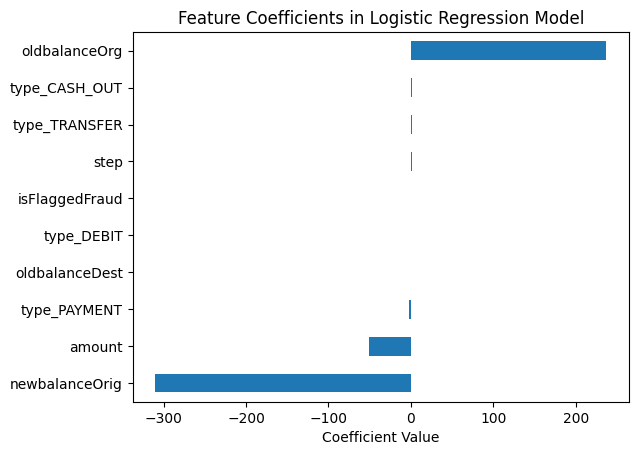

In [27]:
logistic_regression_model = best_pipeline.named_steps['logreg']
coefficients = pd.Series(logistic_regression_model.coef_[0], index=X.columns)
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Model")
plt.xlabel("Coefficient Value")
plt.show()

In [31]:
yhat_prob = logistic_regression_model.predict_proba(X_test.iloc[0:50000])
log_loss(y_test.iloc[0:50000], yhat_prob)

5.774193272936568

#### The model is trained on only 50,000 training samples as higher computations were taking a very long time as training set is reduced as a result the perforance of model is also not very satisfactory.Moreover True positives and False negatives are nearly equal which indicates that alot of of fraud transactions are not being detected and as a result we are also getting a high logloss score =5.77 which is not desired.

#### From feature coefficient values, we can discover that the prediction is greatly impacted by 'newbalanceOrig','amount' and 'oldbalanceOrg' and these features make sense as high account balance or large amount of transactions are suspicious of fraudulent activities.

## Random Forest

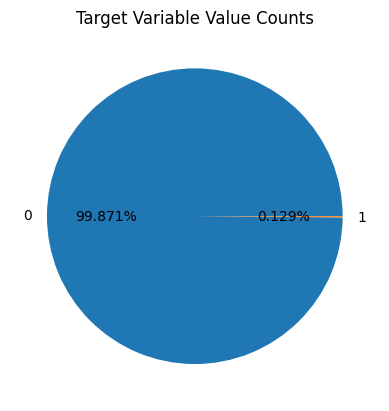

In [20]:
labels = df_encoded.isFraud.unique()

# get the count of each class
sizes = df_encoded.isFraud.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

In [21]:
X1=df_encoded.drop(['nameOrig','nameDest'],axis=1)
X1.corr()['isFraud']

step              0.031578
amount            0.076688
oldbalanceOrg     0.010154
newbalanceOrig   -0.008148
oldbalanceDest   -0.005885
newbalanceDest    0.000535
isFraud           1.000000
isFlaggedFraud    0.044109
type_CASH_OUT     0.011256
type_DEBIT       -0.002911
type_PAYMENT     -0.025697
type_TRANSFER     0.053869
Name: isFraud, dtype: float64

In [22]:
X1=X1.drop(['isFraud','newbalanceDest'],axis=1)

In [23]:
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import StratifiedKFold


import warnings
warnings.filterwarnings('ignore')


In [24]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE # If handling imbalanced data

pipeline = Pipeline([
        ('scaler', StandardScaler()),
        # Optional, if dealing with imbalanced fraud data
        ('rf', RandomForestClassifier(random_state=42))
    ])

In [27]:
param_grid = {
        'rf__n_estimators': [100, 200, 300],
        'rf__max_features': ['sqrt', 'log2'],
        'rf__max_depth': [10, 20, None],
        'rf__min_samples_split': [2, 5],
        'rf__min_samples_leaf': [1, 2],
        'rf__class_weight': ['balanced', None]
    }
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
X1_train_np = X1_train.iloc[0:80000]
y_train_np = y_train.iloc[0:80000]

In [28]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

    # Using GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='recall', n_jobs=-1)

    # Using RandomizedSearchCV (example with fewer iterations for brevity)
    # random_search = RandomizedSearchCV(pipeline, param_grid, n_iter=10, cv=5, scoring='recall', random_state=42, n_jobs=-1)

In [29]:
grid_search.fit(X1_train_np, y_train_np)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__class_weight': ['balanced', None],
                         'rf__max_depth': [10, 20, None],
                         'rf__max_features': ['sqrt', 'log2'],
                         'rf__min_samples_leaf': [1, 2],
                         'rf__min_samples_split': [2, 5],
                         'rf__n_estimators': [100, 200, 300]},
             scoring='recall')

Best parameters: {'rf__class_weight': 'balanced', 'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}


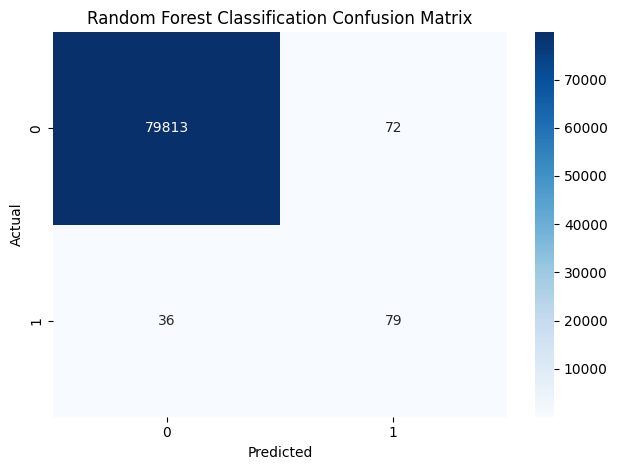

In [31]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Best parameters: {best_params}")
y_predrf = best_model.predict(X1_test.iloc[0:80000])
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test.iloc[0:80000], y_predrf)
import seaborn as sns
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

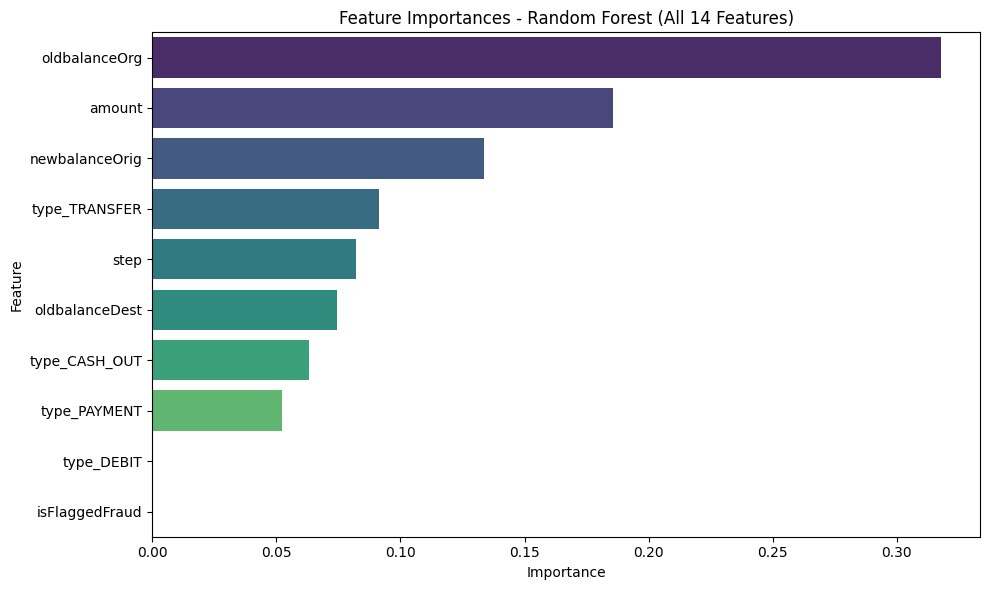

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the trained RandomForest model from the pipeline
rf_model = best_model.named_steps['rf']

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame with feature names and importance values
feature_names = X1_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot all 14 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances - Random Forest (All 14 Features)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#### Similar to the previous model, random forest also gives more importance to same three features as 'oldbalanceOrg','amount'and 'newbalanceOrig'.Additional features like 'type_transfer' and 'step' also stand out in detecting Frauds. As discussed above, these features make sense and type transfer is also more prone to cyber frauds.

In [39]:
print("Accuracy:", best_model.score(X1_test.iloc[0:80000], y_test.iloc[0:80000]))
print("Best CV Recall Score:", grid_search.best_score_)

Accuracy: 0.99865
Best CV Recall Score: 0.6571428571428571


#### High accuracy seen here is misleading as dataset is imbalanced ,recall is not very high at 0.65. Again, this model has also been trained on only 80,000 training samples as greater samples were taking alot of time for the model to train. Hence the model performance can be improved by increasing the training data samples.

In [41]:
from sklearn.metrics import roc_auc_score

y_proba = best_model.predict_proba(X1_test.iloc[0:80000])[:, 1]
roc_auc = roc_auc_score(y_test.iloc[0:80000], y_proba)

print(f"AUC-ROC Score: {roc_auc:.4f}")

AUC-ROC Score: 0.9722


#### AUC-ROC Score is good 0.97 representing the model’s ability to rank positive cases higher than negative ones.

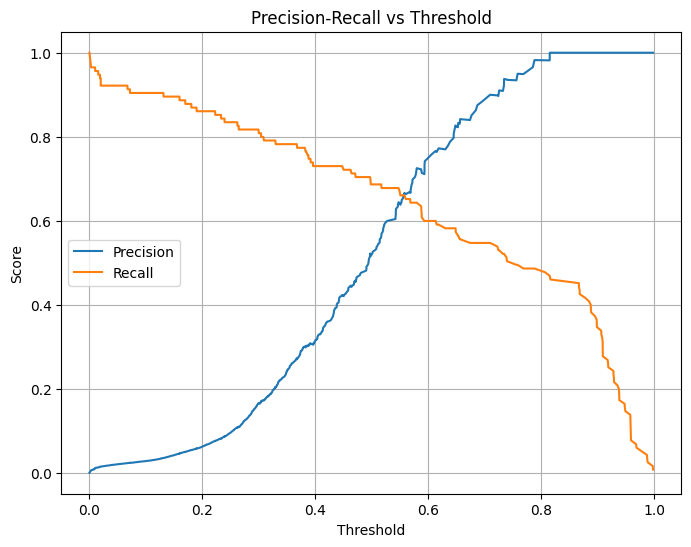

In [42]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test.iloc[0:80000], y_proba)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_proba = best_model.predict_proba(X1_test.iloc[0:80000])[:, 1]

# Set a custom threshold (lower than 0.5)
threshold = 0.48 # Try 0.2, 0.3, 0.4 etc.
y_pred_custom = (y_proba >= threshold).astype(int)

# Recompute metrics
precision = precision_score(y_test.iloc[0:80000], y_pred_custom)
recall = recall_score(y_test.iloc[0:80000], y_pred_custom)
f1 = f1_score(y_test.iloc[0:80000], y_pred_custom)

print(f"Threshold: {threshold}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Threshold: 0.48
Precision: 0.4765
Recall:    0.7043
F1 Score:  0.5684


#### In order to reduce the false negatives, I observed the precision-recall graph and 0.48 seems appropriate threshold value so as to increase recall which means reducing false negatives ,consequently precision will also decrease giving false alarms for non-fraudulent activities.

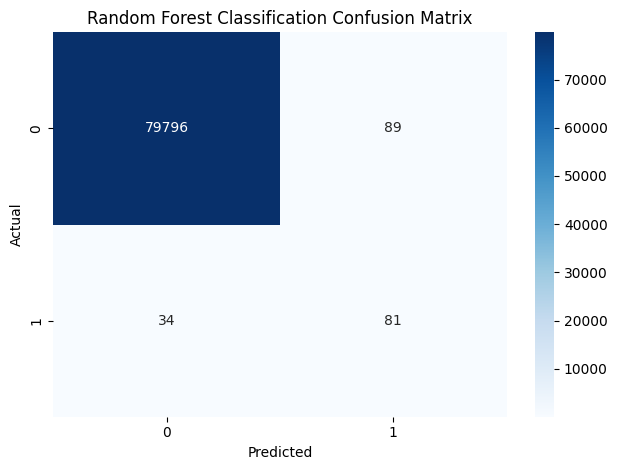

In [61]:
def predict_with_threshold(model, X, threshold=0.48):
    proba = model.predict_proba(X)[:, 1]
    return (proba >= threshold).astype(int)
y_pred_final = predict_with_threshold(best_model, X1_test.iloc[0:80000], threshold=0.48)
conf_matrix = confusion_matrix(y_test.iloc[0:80000], y_pred_final)
import seaborn as sns
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

In [67]:
auc = roc_auc_score(y_test.iloc[0:80000], y_proba)
auc

0.9721572586680309

#### false positives are more than true positives as seen in above confusion matrix, however false negatives have reduced and are less compared to true positives. Moreover as only 80,000 samples were used to train the model ,it is possible that more training data can improve the model.

### Important Features and Why It Makes Sense in Fraud Detection
##### 1. amount- Large transactions are a common sign of fraud, especially when attempting to drain an account quickly.
##### 2. oldbalanceOrg- Fraudsters often target accounts with high balances to maximize gains.
##### 3. newbalanceOrig- Many fraud cases result in zero remaining balance, showing full withdrawal.
##### 4. type_transfer- Fraud is more likely in TRANSFER than in internal system operations.
##### 5. step- Time of transaction can matter — frauds often occur in off-peak hours or during system “downtime” when fewer alerts or interventions are active.

### Here are some strategic prevention mechanisms to integrate into the system upgrade

##### 1. Real-time Fraud Scoring- Integrate the ML model into the transaction system to score transactions in real time before approval.
##### 2. Threshold-based Triggers- Auto-block or flag transactions that meet risk rules (e.g., large amount + zero post-balance + TRANSFER).
##### 3. Velocity Checks- Monitor for unusual transaction frequency or amount spikes per account.
##### 4. Geo/Device Anomaly Detection- Flag transactions from new devices/locations inconsistent with user history.
##### 5. Audit Logging & Monitoring- Ensure all transactions and model decisions are logged and monitor for spikes in fraud predictions.
##### 6. Manual Review Queue- Route medium-risk transactions for human review instead of auto-approval.
##### 7. Tiered Risk System	Classify transactions into Low, Medium, High risk, and respond accordingly.
##### 8. Awareness & Training- Train support teams and analysts to interpret model alerts and act on them correctly.
##### 9. Customer Communication	For borderline cases, consider transaction verification messages or OTPs.

### Further we can check the effectiveness of the above methods in the following ways:

##### 1. Reduction in Fraud Loss- Compare monetary loss from fraud before vs. after deployment.
##### 2. Detection Rate (Recall)- Measure how many actual frauds are caught over time — aim to improve this consistently.
##### 3. False Positive Rate	Track- how often legitimate transactions are incorrectly flagged — must keep this under control.
##### 4. Customer Impact- Monitor complaints, failed transactions, or delays — a low number means the system is working smoothly.